In [71]:
import numpy as np
# Load the training data and labels
train_data = np.load('X_kannada_MNIST_train.npz')
X_train = train_data['arr_0']
train_labels = np.load('y_kannada_MNIST_train.npz')
y_train = train_labels['arr_0']
# Load the test data and labels
test_data = np.load('X_kannada_MNIST_test.npz')
X_test = test_data['arr_0']

test_labels = np.load('y_kannada_MNIST_test.npz')
y_test = test_labels['arr_0']

# Print the shapes of the loaded data
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


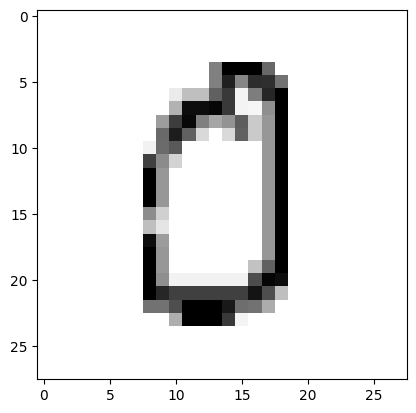

In [72]:
import matplotlib.pyplot as plt
import matplotlib
some_digit=X_train[90]
some_digit_img=some_digit.reshape(28,28)
plt.imshow(some_digit_img,cmap=matplotlib.cm.binary,interpolation="nearest")

In [73]:
y_train[90]

0

##  Perform PCA to 10 components. So now we have train and test images in 10 dimension insteadof 28X28 dimension.

In [74]:
from sklearn.decomposition import PCA

X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

# Perform PCA with 10 components
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_2d)
X_test_pca = pca.transform(X_test_2d)

# You can also access the explained variance ratio to see how much variance is retained
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)





Explained Variance Ratio: [0.07972071 0.05570993 0.04466606 0.03657989 0.03445836 0.02782341
 0.02437056 0.02091766 0.02036084 0.01722765]


In [75]:
y_train[1].dtype

dtype('uint8')

# 3. Now apply the the following models:
#• Decision Trees
#• Random forest
#• Naive Bayes Model
#• K-NN Classifier
#• SVM

# 4. For each of this method produce the following metrics:
• Precision, Recall, F1 - Score
• Confusion Matrix
• RoC - AUC curve

In [76]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score,confusion_matrix

def evaluate_model(model, x_train, y_train, x_test, y_test):
    # Fit the model on the training data
    model.fit(x_train, y_train)

    # Predict labels for the test data
    y_pred = model.predict(x_test)

    # Calculate accuracy, f1-score, and recall
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')

    # Calculate ROC-AUC score
    y_pred_proba = model.predict_proba(x_test)
    roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    
    ## Calculating Confusion Matrix
    conf_matrix=confusion_matrix(y_test,y_pred)

    # Return evaluation metrics
    return accuracy, f1, recall, roc_auc, conf_matrix

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
dt_classifier = DecisionTreeClassifier()
dt_accuracy, dt_f1, dt_recall, dt_roc_auc, dt_confusion_matrix = evaluate_model(dt_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree F1-score:", dt_f1)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree ROC-AUC:", dt_roc_auc)
print("Decision Tree Confusion Matrix:")
print(dt_confusion_matrix)

Decision Tree Accuracy: 0.8005
Decision Tree F1-score: 0.7997624498486259
Decision Tree Recall: 0.8005000000000001
Decision Tree ROC-AUC: 0.8891666666666665
Decision Tree Confusion Matrix:
[[713 157  11  41  10   1   1   9  35  22]
 [ 79 803   3  26  14  18   4   9  27  17]
 [  6   3 927   8   2  21  14   7   5   7]
 [ 16  14   5 765  41  35  31  50  22  21]
 [  2   3   4  35 864  42   7   5  16  22]
 [  5  16   4  18 119 791  11   8  13  15]
 [  5   6   6  44  22  27 766  96   6  22]
 [ 14  11   7  66  30  11 143 674  13  31]
 [ 49  22  13   5   8   8   2   5 868  20]
 [ 15  32   1   7  24  12   7  12  56 834]]


In [78]:
rf_classifier = RandomForestClassifier()
rf_accuracy, rf_f1, rf_recall, rf_roc_auc, rf_confusion_matrix = evaluate_model(rf_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest F1-score:", rf_f1)
print("Random Forest Recall:", rf_recall)
print("Random Forest ROC-AUC:", rf_roc_auc)
print("Random Forest Confusion Matrix",rf_confusion_matrix)

Random Forest Accuracy: 0.8765
Random Forest F1-score: 0.8758306571005761
Random Forest Recall: 0.8765000000000001
Random Forest ROC-AUC: 0.9893522444444445
Random Forest Confusion Matrix [[778 152   1  32   4   2   2   3  19   7]
 [ 35 908   1  20   6   4   0   2  16   8]
 [  2   2 980   3   0   7   1   2   1   2]
 [ 10   9   1 883  19  17  11  31  17   2]
 [  0   1   0  26 927  30   0   3   7   6]
 [  0   2   1  11 120 850   3   3   7   3]
 [  2   8   1  46  12  26 836  51   2  16]
 [  5   7   1  41  21   2 131 748  11  33]
 [ 16  14   3   3   3   5   1   0 952   3]
 [  7   7   0   3  17   1   7   4  51 903]]


In [79]:
nb_classifier = GaussianNB()
nb_accuracy, nb_f1, nb_recall, nb_roc_auc, nb_confusion_matrix = evaluate_model(nb_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes F1-score:", nb_f1)
print("Naive Bayes Recall:", nb_recall)
print("Naive Bayes ROC-AUC:", nb_roc_auc)
print("Naive Bayes Confusion Matrix:")
print(nb_confusion_matrix)

Naive Bayes Accuracy: 0.7722
Naive Bayes F1-score: 0.7708290054078343
Naive Bayes Recall: 0.7722
Naive Bayes ROC-AUC: 0.9722774222222222
Naive Bayes Confusion Matrix:
[[608 229  16  70   8   0   2  13  45   9]
 [ 26 748   9 121   8   2   0   0  65  21]
 [  9   1 967   3   0  15   1   3   1   0]
 [ 13   7   2 843  33  16  21  64   0   1]
 [  1   1   1  39 872  43   1   7  28   7]
 [  0   2  15  47 165 731   6  16  13   5]
 [  5   9  50  30  25  45 729  94   3  10]
 [  9  17   4  80  51   1 176 650   2  10]
 [ 89  36  26   6   4   3   2   4 822   8]
 [ 19  28   1   8  62   0   3  21 106 752]]


In [80]:
knn_classifier = KNeighborsClassifier(n_neighbors=8)
knn_accuracy, knn_f1, knn_recall, knn_roc_auc, knn_confusion_matrix = evaluate_model(knn_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("K-NN Accuracy:", knn_accuracy)
print("K-NN F1-score:", knn_f1)
print("K-NN Recall:", knn_recall)
print("K-NN ROC-AUC:", knn_roc_auc)
print("K-NN Confusion Matrix")
print(knn_confusion_matrix)

K-NN Accuracy: 0.8814
K-NN F1-score: 0.8803153161422452
K-NN Recall: 0.8814
K-NN ROC-AUC: 0.9737883055555556
K-NN Confusion Matrix
[[776 169   1  27   2   0   2   3  14   6]
 [ 18 943   0  16   4   1   0   2  11   5]
 [  6   1 979   3   0   7   1   2   1   0]
 [ 10  12   0 886  20  22   4  15  26   5]
 [  0   1   0  14 952  22   1   2   4   4]
 [  0   3   0   8 116 857   3   3   4   6]
 [  0   6   0  42  21  10 840  67   0  14]
 [  7   8   0  52  34   3 164 701   6  25]
 [ 15   9   2   2   3   6   2   0 958   3]
 [  5   7   0   0  26   0   7   4  29 922]]


In [81]:
svm_classifier = SVC(probability=True)
svm_accuracy, svm_f1, svm_recall, svm_roc_auc, svm_confusion_matrix = evaluate_model(svm_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("SVM Accuracy:", svm_accuracy)
print("SVM F1-score:", svm_f1)
print("SVM Recall:", svm_recall)
print("SVM ROC-AUC:", svm_roc_auc)
print("SVM confusion Matrix")
print(svm_confusion_matrix)

SVM Accuracy: 0.8873
SVM F1-score: 0.8867745822254248
SVM Recall: 0.8873000000000001
SVM ROC-AUC: 0.9925455777777777
SVM confusion Matrix
[[810 140   1  22   6   0   1   2  15   3]
 [ 19 925   0  27   2   3   0   5  11   8]
 [  3   2 984   1   0   5   0   3   1   1]
 [  8  11   0 886  20  21  10  26  18   0]
 [  0   1   0  14 948  22   0   0   5  10]
 [  0   4   1   4 124 854   3   3   4   3]
 [  0  10   1  49  20  21 846  40   0  13]
 [  6  13   0  33  16   4 135 748   7  38]
 [  8  14   3   0   4   4   3   0 960   4]
 [  2  13   0   0  23   0   6   3  41 912]]


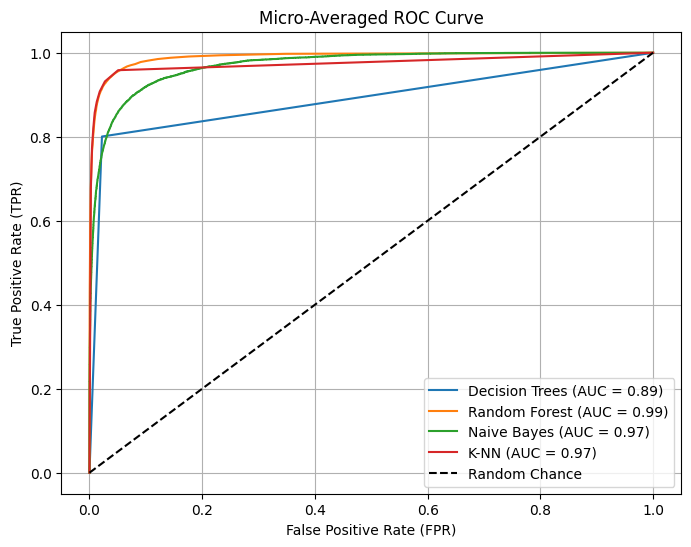

In [82]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Convert the true labels to one-hot encoded format
y_test_bin = label_binarize(y_test, classes=range(10))

# For Decision Trees
dt_pred_probs = dt_classifier.predict_proba(X_test_pca)
dt_fpr, dt_tpr, _ = roc_curve(y_test_bin.ravel(), dt_pred_probs.ravel())
dt_auc = auc(dt_fpr, dt_tpr)

# For Random Forest
rf_pred_probs = rf_classifier.predict_proba(X_test_pca)
rf_fpr, rf_tpr, _ = roc_curve(y_test_bin.ravel(), rf_pred_probs.ravel())
rf_auc = auc(rf_fpr, rf_tpr)

# For Naive Bayes
nb_pred_probs = nb_classifier.predict_proba(X_test_pca)
nb_fpr, nb_tpr, _ = roc_curve(y_test_bin.ravel(), nb_pred_probs.ravel())
nb_auc = auc(nb_fpr, nb_tpr)

# For K-NN
knn_pred_probs = knn_classifier.predict_proba(X_test_pca)
knn_fpr, knn_tpr, _ = roc_curve(y_test_bin.ravel(), knn_pred_probs.ravel())
knn_auc = auc(knn_fpr, knn_tpr)


# Plot micro-averaged ROC curves for each classifier
plt.figure(figsize=(8, 6))
plt.plot(dt_fpr, dt_tpr, label='Decision Trees (AUC = {:.2f})'.format(dt_auc))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(rf_auc))
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (AUC = {:.2f})'.format(nb_auc))
plt.plot(knn_fpr, knn_tpr, label='K-NN (AUC = {:.2f})'.format(knn_auc))
#plt.plot(svm_fpr, svm_tpr, label='SVM (AUC = {:.2f})'.format(svm_auc))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Micro-Averaged ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

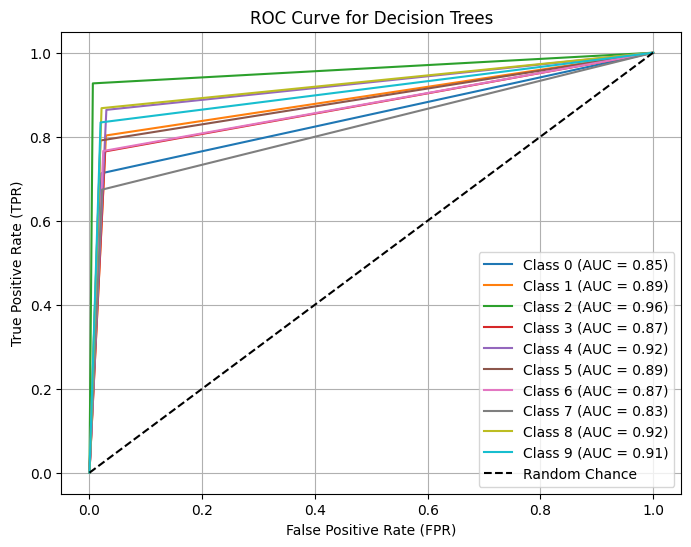

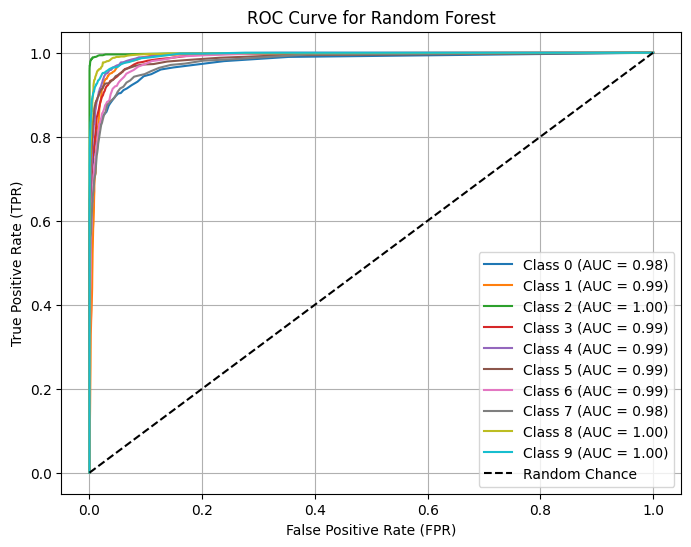

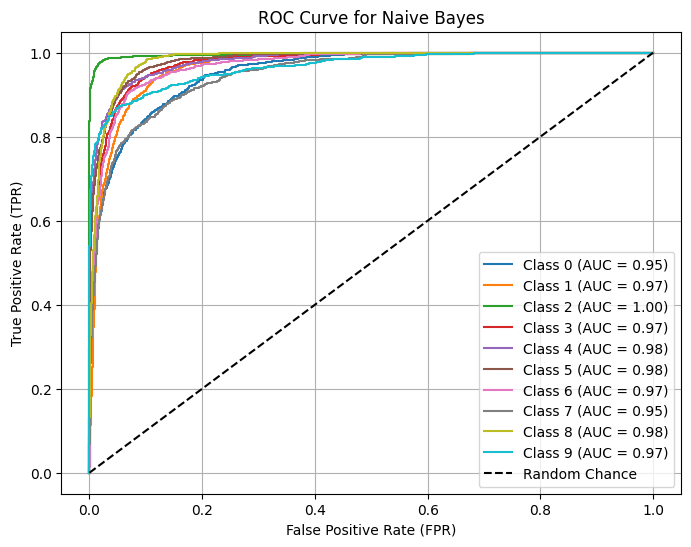

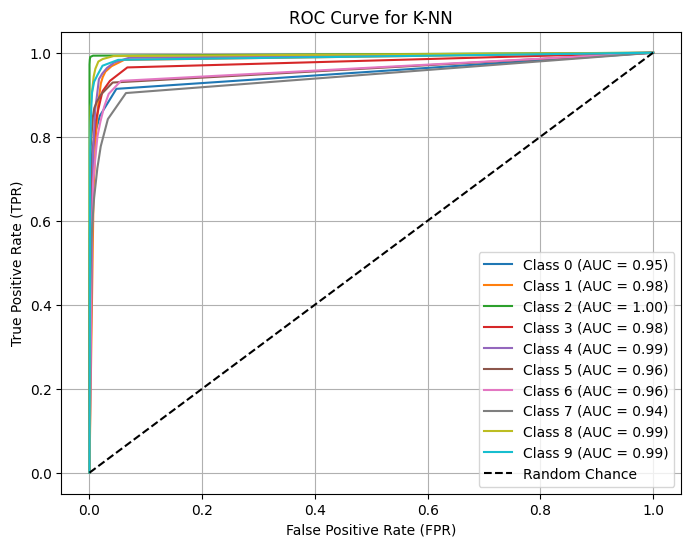

In [83]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Convert the true labels to one-hot encoded format
y_test_bin = label_binarize(y_test, classes=range(10))

# For Decision Trees
dt_fpr = dict()
dt_tpr = dict()
dt_auc = dict()
for class_idx in range(10):
    dt_pred_probs = dt_classifier.predict_proba(X_test_pca)[:, class_idx]
    dt_fpr[class_idx], dt_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], dt_pred_probs)
    dt_auc[class_idx] = auc(dt_fpr[class_idx], dt_tpr[class_idx])

# For Random Forest
rf_fpr = dict()
rf_tpr = dict()
rf_auc = dict()
for class_idx in range(10):
    rf_pred_probs = rf_classifier.predict_proba(X_test_pca)[:, class_idx]
    rf_fpr[class_idx], rf_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], rf_pred_probs)
    rf_auc[class_idx] = auc(rf_fpr[class_idx], rf_tpr[class_idx])

# For Naive Bayes
nb_fpr = dict()
nb_tpr = dict()
nb_auc = dict()
for class_idx in range(10):
    nb_pred_probs = nb_classifier.predict_proba(X_test_pca)[:, class_idx]
    nb_fpr[class_idx], nb_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], nb_pred_probs)
    nb_auc[class_idx] = auc(nb_fpr[class_idx], nb_tpr[class_idx])

# For K-NN
knn_fpr = dict()
knn_tpr = dict()
knn_auc = dict()
for class_idx in range(10):
    knn_pred_probs = knn_classifier.predict_proba(X_test_pca)[:, class_idx]
    knn_fpr[class_idx], knn_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], knn_pred_probs)
    knn_auc[class_idx] = auc(knn_fpr[class_idx], knn_tpr[class_idx])

# Plot ROC curves for each class for Decision Trees
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(dt_fpr[class_idx], dt_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, dt_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Decision Trees')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot ROC curves for each class for Random Forest
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(rf_fpr[class_idx], rf_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, rf_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot ROC curves for each class for Naive Bayes
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(nb_fpr[class_idx], nb_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, nb_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Naive Bayes')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot ROC curves for each class for K-NN
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(knn_fpr[class_idx], knn_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, knn_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for K-NN')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [84]:
X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)
component_sizes = [15, 20, 25, 30]
for n_components in component_sizes:
    # Perform PCA with the current number of components
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_2d)
    X_test_pca = pca.transform(X_test_2d)

In [85]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score

def evaluate_model(classifier, X_train, y_train, X_test, y_test):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    y_prob = classifier.predict_proba(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    
    # Calculate ROC-AUC for multiclass
    roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
    
    return accuracy, f1, recall, roc_auc




In [86]:
dt_classifier = DecisionTreeClassifier()
dt_accuracy, dt_f1, dt_recall, dt_roc_auc = evaluate_model(dt_classifier, X_train_pca, y_train, X_test_pca, y_test)
for i, n_components in enumerate(component_sizes):
    print(f"Component Size {n_components}:")
    print("Decision Tree Accuracy:", dt_accuracy)
    print("Decision Tree F1-score:", dt_f1)
    print("Decision Tree Recall:", dt_recall)
    print("Decision Tree ROC-AUC:", dt_roc_auc)

    

Component Size 15:
Decision Tree Accuracy: 0.8027
Decision Tree F1-score: 0.8016631612641809
Decision Tree Recall: 0.8027
Decision Tree ROC-AUC: 0.8903888888888888
Component Size 20:
Decision Tree Accuracy: 0.8027
Decision Tree F1-score: 0.8016631612641809
Decision Tree Recall: 0.8027
Decision Tree ROC-AUC: 0.8903888888888888
Component Size 25:
Decision Tree Accuracy: 0.8027
Decision Tree F1-score: 0.8016631612641809
Decision Tree Recall: 0.8027
Decision Tree ROC-AUC: 0.8903888888888888
Component Size 30:
Decision Tree Accuracy: 0.8027
Decision Tree F1-score: 0.8016631612641809
Decision Tree Recall: 0.8027
Decision Tree ROC-AUC: 0.8903888888888888


In [87]:
rf_classifier = RandomForestClassifier()
rf_accuracy, rf_f1, rf_recall, rf_roc_auc = evaluate_model(rf_classifier, X_train_pca, y_train, X_test_pca, y_test)
for i, n_components in enumerate(component_sizes):
    print(f"Component Size {n_components}:")
    print("Random Forest Accuracy:", rf_accuracy)
    print("Random Forest F1-score:", rf_f1)
    print("Random Forest Recall:", rf_recall)
    print("Random Forest ROC-AUC:", rf_roc_auc)


Component Size 15:
Random Forest Accuracy: 0.9044
Random Forest F1-score: 0.9037355707092128
Random Forest Recall: 0.9043999999999999
Random Forest ROC-AUC: 0.9934858333333333
Component Size 20:
Random Forest Accuracy: 0.9044
Random Forest F1-score: 0.9037355707092128
Random Forest Recall: 0.9043999999999999
Random Forest ROC-AUC: 0.9934858333333333
Component Size 25:
Random Forest Accuracy: 0.9044
Random Forest F1-score: 0.9037355707092128
Random Forest Recall: 0.9043999999999999
Random Forest ROC-AUC: 0.9934858333333333
Component Size 30:
Random Forest Accuracy: 0.9044
Random Forest F1-score: 0.9037355707092128
Random Forest Recall: 0.9043999999999999
Random Forest ROC-AUC: 0.9934858333333333


In [89]:
nb_classifier = GaussianNB()
nb_accuracy, nb_f1, nb_recall, nb_roc_auc = evaluate_model(nb_classifier, X_train_pca, y_train, X_test_pca, y_test)
for i, n_components in enumerate(component_sizes):
    print(f"Component Size {n_components}:")
    print("Naive Bayes Accuracy:", nb_accuracy)
    print("Naive Bayes F1-score:", nb_f1)
    print("Naive Bayes Recall:", nb_recall)
    print("Naive Bayes ROC-AUC:", nb_roc_auc)

Component Size 15:
Naive Bayes Accuracy: 0.8136
Naive Bayes F1-score: 0.8123951077162094
Naive Bayes Recall: 0.8135999999999999
Naive Bayes ROC-AUC: 0.9791526111111111
Component Size 20:
Naive Bayes Accuracy: 0.8136
Naive Bayes F1-score: 0.8123951077162094
Naive Bayes Recall: 0.8135999999999999
Naive Bayes ROC-AUC: 0.9791526111111111
Component Size 25:
Naive Bayes Accuracy: 0.8136
Naive Bayes F1-score: 0.8123951077162094
Naive Bayes Recall: 0.8135999999999999
Naive Bayes ROC-AUC: 0.9791526111111111
Component Size 30:
Naive Bayes Accuracy: 0.8136
Naive Bayes F1-score: 0.8123951077162094
Naive Bayes Recall: 0.8135999999999999
Naive Bayes ROC-AUC: 0.9791526111111111


In [91]:
knn_classifier = KNeighborsClassifier(n_neighbors=8)
knn_accuracy, knn_f1, knn_recall, knn_roc_auc = evaluate_model(knn_classifier, X_train_pca, y_train, X_test_pca, y_test)
for i, n_components in enumerate(component_sizes):
    print(f"Component Size {n_components}:")
    print("K-NN Accuracy:", knn_accuracy)
    print("K-NN F1-score:", knn_f1)
    print("K-NN Recall:", knn_recall)
    print("K-NN ROC-AUC:", knn_roc_auc)

Component Size 15:
K-NN Accuracy: 0.926
K-NN F1-score: 0.9256496532106274
K-NN Recall: 0.9259999999999999
K-NN ROC-AUC: 0.9856441666666665
Component Size 20:
K-NN Accuracy: 0.926
K-NN F1-score: 0.9256496532106274
K-NN Recall: 0.9259999999999999
K-NN ROC-AUC: 0.9856441666666665
Component Size 25:
K-NN Accuracy: 0.926
K-NN F1-score: 0.9256496532106274
K-NN Recall: 0.9259999999999999
K-NN ROC-AUC: 0.9856441666666665
Component Size 30:
K-NN Accuracy: 0.926
K-NN F1-score: 0.9256496532106274
K-NN Recall: 0.9259999999999999
K-NN ROC-AUC: 0.9856441666666665


In [92]:
svm_classifier = SVC(probability=True)
svm_accuracy, svm_f1, svm_recall, svm_roc_auc = evaluate_model(svm_classifier, X_train_pca, y_train, X_test_pca, y_test)
for i, n_components in enumerate(component_sizes):
    print(f"Component Size {n_components}:")
    print("SVM Accuracy:", svm_accuracy)
    print("SVM F1-score:", svm_f1)
    print("SVM Recall:", svm_recall)
    print("SVM ROC-AUC:", svm_roc_auc)

Component Size 15:
SVM Accuracy: 0.9389
SVM F1-score: 0.9386129977291
SVM Recall: 0.9389000000000001
SVM ROC-AUC: 0.9974119777777778
Component Size 20:
SVM Accuracy: 0.9389
SVM F1-score: 0.9386129977291
SVM Recall: 0.9389000000000001
SVM ROC-AUC: 0.9974119777777778
Component Size 25:
SVM Accuracy: 0.9389
SVM F1-score: 0.9386129977291
SVM Recall: 0.9389000000000001
SVM ROC-AUC: 0.9974119777777778
Component Size 30:
SVM Accuracy: 0.9389
SVM F1-score: 0.9386129977291
SVM Recall: 0.9389000000000001
SVM ROC-AUC: 0.9974119777777778
